## Example of ML on Images:  Classifying Handwritten Digits

This extends the logistic regression example, and we'll abbreviate some of the code/cells at the beginning.

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import dtreeviz
import ipywidgets

In [2]:
d = sklearn.datasets.load_digits()

x = d.data
y = d.target

print('We have %d samples, each with %d features' % (x.shape[0],
                                                     x.shape[1]))

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42, stratify=y)

scaler = sklearn.preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

We have 1797 samples, each with 64 features


## Logistic Regression

In [3]:
import sklearn.linear_model
lr_classifier = sklearn.linear_model.LogisticRegression()

In [4]:
lr_classifier.fit(x_scaled, y_train)

LogisticRegression()

In [5]:
y_pred = lr_classifier.predict(x_test_scaled)

In [6]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")

Accuracy: 97.22%


In [7]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]])

# Decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

In [9]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
tree_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
y_pred = tree_clf.predict(x_test)

In [12]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 26,  1,  2,  1,  0,  3,  1,  2,  0],
       [ 1,  0, 28,  2,  0,  1,  1,  0,  2,  0],
       [ 0,  0,  1, 31,  0,  1,  0,  1,  1,  2],
       [ 1,  1,  0,  1, 31,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 35,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  3, 30,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 33,  0,  1],
       [ 0,  5,  0,  1,  0,  1,  0,  5, 23,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  3,  3, 27]])

In [13]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")

Accuracy: 83.06%


### Interpretation?

In [14]:
text_representation = sklearn.tree.export_text(tree_clf)
print(text_representation)

|--- feature_36 <= 0.50
|   |--- feature_28 <= 4.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_53 <= 6.00
|   |   |   |   |--- class: 5
|   |   |   |--- feature_53 >  6.00
|   |   |   |   |--- feature_37 <= 5.50
|   |   |   |   |   |--- feature_10 <= 8.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_10 >  8.50
|   |   |   |   |   |   |--- feature_26 <= 9.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_26 >  9.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_37 >  5.50
|   |   |   |   |   |--- class: 4
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_42 <= 3.50
|   |   |   |   |--- class: 9
|   |   |   |--- feature_42 >  3.50
|   |   |   |   |--- class: 0
|   |--- feature_28 >  4.50
|   |   |--- feature_21 <= 9.00
|   |   |   |--- feature_20 <= 10.50
|   |   |   |   |--- feature_33 <= 6.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_33 >  6.50
|   |   |   |   |  

In [15]:
tree_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

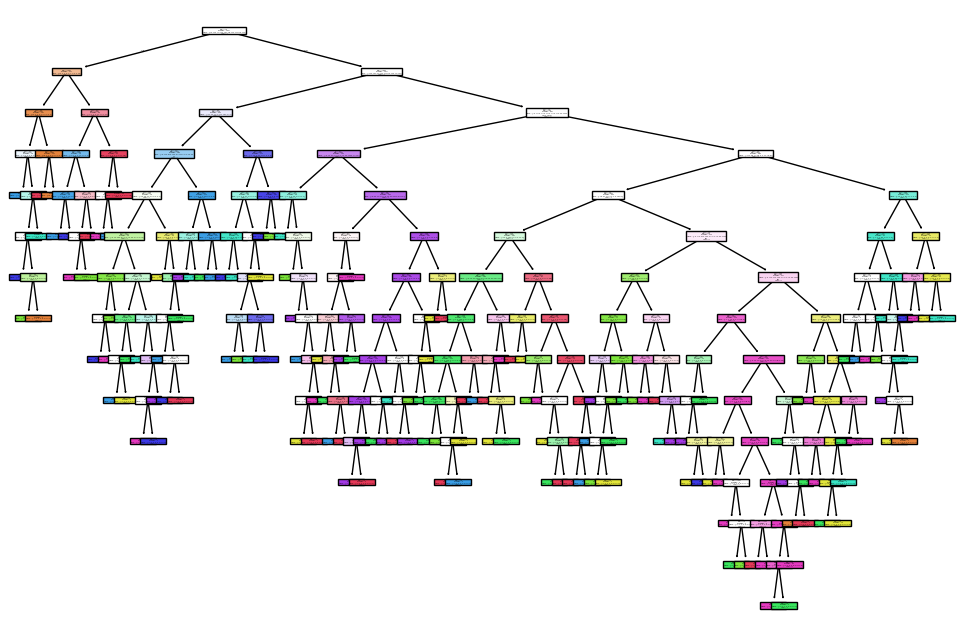

In [16]:
plt.figure(figsize=(12,8))
sklearn.tree.plot_tree(tree_clf, 
               feature_names=range(64),  
               class_names=[str(i) for i in tree_clf.classes_],
               filled=True);

In [17]:
%%capture --no-display

vizmodel = dtreeviz.model(tree_clf, 
         x,
         y,
         feature_names=range(64),
         class_names=[i for i in tree_clf.classes_],
         target_name="y")

vizmodel.view()

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [19]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
rf_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
y_pred = rf_clf.predict(x_test)

In [22]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 33]])

In [23]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, lr_classifier.predict(x_test_scaled)):.2%}")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, tree_clf.predict(x_test)):.2%}")
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, rf_clf.predict(x_test)):.2%}")

Accuracy: 97.22%
Accuracy: 83.06%
Accuracy: 96.94%


Can we improve the Random Forest accuracy?

Actually, what parameters does it currently have?

In [24]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
cv_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                       param_grid = {
                           'max_depth' : [None,10,20],
                           'n_estimators' : [50,100,200],
                           'max_leaf_nodes' : [None,5,10]
                       })
cv_grid.fit(x_train, y_train)
cv_grid.best_params_

{'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 200}

In [27]:
y_pred = cv_grid.predict(x_test)

In [28]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  2, 30,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 33]])

In [29]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")

Accuracy: 96.39%


### Interpretation?

In [30]:
rf_clf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=2020824189)

In [31]:
def plttrees(t=0):
    plt.figure(figsize=(12,8))
    sklearn.tree.plot_tree(rf_clf.estimators_[t], 
               feature_names=range(64),  
               class_names=[str(i) for i in tree_clf.classes_],
               filled=True);

ipywidgets.interact(plttrees, t=range(len(rf_clf.estimators_)));

interactive(children=(Dropdown(description='t', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

In [32]:
rf_clf.feature_importances_

array([0.00000000e+00, 2.02507247e-03, 2.18702266e-02, 1.09341477e-02,
       9.79382310e-03, 2.40615696e-02, 7.94199402e-03, 4.55609512e-04,
       3.86823973e-06, 1.13843081e-02, 2.48812839e-02, 7.09646195e-03,
       1.49338879e-02, 3.13748795e-02, 4.89461474e-03, 5.75740261e-04,
       0.00000000e+00, 8.48135943e-03, 2.04602197e-02, 2.43889426e-02,
       3.39593071e-02, 5.03269606e-02, 8.63115101e-03, 3.32578672e-04,
       5.50848411e-05, 1.40885010e-02, 4.12530064e-02, 2.67651145e-02,
       3.59297261e-02, 2.55734346e-02, 2.67127643e-02, 6.99858800e-05,
       0.00000000e+00, 3.34647953e-02, 2.59917476e-02, 1.58047587e-02,
       3.75237957e-02, 1.98122904e-02, 2.57603567e-02, 0.00000000e+00,
       3.88004425e-05, 1.00462949e-02, 2.96209111e-02, 4.18318218e-02,
       2.10630182e-02, 1.71556509e-02, 1.81647893e-02, 1.02744717e-04,
       0.00000000e+00, 2.14543124e-03, 1.93608186e-02, 2.26109571e-02,
       1.37425824e-02, 2.42146136e-02, 2.49862431e-02, 2.20449230e-03,
      

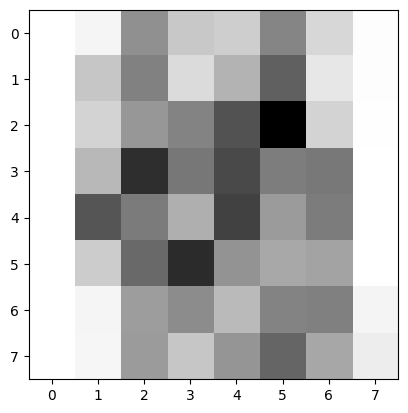

In [33]:
plt.imshow(rf_clf.feature_importances_.reshape(8,8),
           cmap='binary')